In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df_homicidios = pd.read_excel('archivos/homicidios.xlsx',)
df_hom_victimas = pd.read_excel('archivos/homicidios.xlsx',sheet_name=2)


In [4]:
df_homicidios.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [5]:
df_hom_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


se puede observar que hay similitud en las tablas en ID, se realizará un merged

In [21]:
df_fusionado = pd.merge(left=df_homicidios, right=df_hom_victimas, left_on="ID", right_on="ID_hecho", how="inner")
df_fusionado

,ID,N_VICTIMAS,FECHA_x,AAAA_x,MM_x,DD_x,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,ID_hecho,FECHA_y,AAAA_y,MM_y,DD_y,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
713,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
714,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00
715,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,2021-0096,2021-12-15,2021,12,15,CONDUCTOR,AUTO,MASCULINO,60,2021-12-20 00:00:00


ya que se puede observar que se repiten columnas se eliminara las columnas repetidas, la columna hora ya que redunda con HH y fecha con los datos AAAA MM DD

In [22]:
df_fusionado = df_fusionado.drop(['N_VICTIMAS','FECHA_x','HORA','FECHA_y', 'MM_y', 'DD_y', 'AAAA_y', 'VICTIMA_y','FECHA_FALLECIMIENTO', 'ID_hecho'],axis=1)
df_fusionado

,ID,AAAA_x,MM_x,DD_x,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,...,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA_x,ACUSADO,ROL,SEXO,EDAD
0,2016-0001,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",...,8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19
1,2016-0002,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,...,9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70
2,2016-0003,2016,1,3,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,NaN,...,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30
3,2016-0004,2016,1,10,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.",...,8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18
4,2016-0005,2016,1,21,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,NaN,"SAENZ PE?A, LUIS, PRES.",...,1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,2021,12,13,17,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV.,NaN,MOM,...,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18
713,2021-0094,2021,12,20,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",NaN,LACARRA AV.,...,9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43
714,2021-0095,2021,12,30,0,AV. GAONA Y TERRADA,AVENIDA,GAONA AV.,NaN,TERRADA,...,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,27
715,2021-0096,2021,12,15,10,AV. EVA PERON 4071,AVENIDA,"PERON, EVA AV.",4071.0,NaN,...,9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO,60


In [23]:
df_fusionado['VICTIMA_x'].unique()

array(['MOTO', 'AUTO', 'PEATON', 'SD', 'CARGAS', 'BICICLETA', 'PASAJEROS',
       'MOVIL', 'OBJETO FIJO', 'PEATON_MOTO'], dtype=object)

In [24]:
df_filtrado = df_fusionado[df_fusionado['VICTIMA_x'].str.contains('PEATON_MOTO')]
df_filtrado


,ID,AAAA_x,MM_x,DD_x,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,...,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA_x,ACUSADO,ROL,SEXO,EDAD
602,2020-0063,2020,12,5,7,NUEVA YORK Y ALTA GRACIA,CALLE,NUEVA YORK,NaN,ALTA GRACIA,...,11,Point (94080.62190808 102083.62453795),-58.52783814,-34.61047001,PEATON_MOTO-MOTO,PEATON_MOTO,MOTO,PEATON,MASCULINO,38
603,2020-0063,2020,12,5,7,NUEVA YORK Y ALTA GRACIA,CALLE,NUEVA YORK,NaN,ALTA GRACIA,...,11,Point (94080.62190808 102083.62453795),-58.52783814,-34.61047001,PEATON_MOTO-MOTO,PEATON_MOTO,MOTO,PASAJERO_ACOMPAÑANTE,MASCULINO,21


se puede observar que hay un error de transcripción en victima, por lo que se procede a cambiar

In [25]:
df_fusionado['VICTIMA_x'].replace('PEATON_MOTO', 'PEATON', inplace=True)


In [26]:
df_fusionado['ACUSADO'].unique()

array(['AUTO', 'PASAJEROS', 'SD', 'OBJETO FIJO', 'CARGAS', 'MOTO',
       'MULTIPLE', 'OTRO', 'BICICLETA', 'TREN'], dtype=object)

se comprueba que todas los registros estan bien

In [31]:
df_fusionado.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 716
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     717 non-null    object 
 1   AAAA_x                 717 non-null    int64  
 2   MM_x                   717 non-null    int64  
 3   DD_x                   717 non-null    int64  
 4   HH                     717 non-null    object 
 5   LUGAR_DEL_HECHO        717 non-null    object 
 6   TIPO_DE_CALLE          717 non-null    object 
 7   Calle                  716 non-null    object 
 8   Altura                 133 non-null    float64
 9   Cruce                  540 non-null    object 
 10  Dirección Normalizada  708 non-null    object 
 11  COMUNA                 717 non-null    int64  
 12  XY (CABA)              717 non-null    object 
 13  pos x                  717 non-null    object 
 14  pos y                  717 non-null    object 
 15  PARTIC

se leera el archivo lesiones

In [51]:
df_lesiones = pd.read_excel('archivos/lesiones.xlsx',)
df_les_victimas = pd.read_excel('archivos/lesiones.xlsx',sheet_name=2)


In [52]:
df_lesiones.head()

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,SD,14,...,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,SD,8,...,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,SD,8,...,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2,SD,7,...,-34.647349,PEATON,SD,PEATON-SD,x,SD,SD,SD,SD,SD
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4,SD,3,...,-34.604579,AUTO,SD,AUTO-SD,SD,SD,x,SD,SD,SD


In [57]:
df_les_victimas.head()

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000053,2019,1,1,2019-01-01,sd,Varon,57,SD
1,LC-2019-0000063,2019,1,1,2019-01-01,sd,SD,SD,SD
2,LC-2019-0000079,2019,1,1,2019-01-01,sd,Varon,SD,SD
3,LC-2019-0000082,2019,1,1,2019-01-01,sd,Varon,45,SD
4,LC-2019-0000082,2019,1,1,2019-01-01,sd,Mujer,45,SD


se puede observar que hay similitud en las tablas en id con ID hecho, se realizará un merged

In [64]:
df_consolidado = pd.merge(left=df_lesiones, right=df_les_victimas, left_on="id", right_on="ID hecho", how="inner")
df_consolidado

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,gravedad,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,SD,14,...,SD,LC-2019-0000179,2019,1,1,2019-01-01,sd,SD,SD,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,SD,8,...,SD,LC-2019-0000053,2019,1,1,2019-01-01,sd,Varon,57,SD
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,SD,8,...,SD,LC-2019-0000063,2019,1,1,2019-01-01,sd,SD,SD,SD
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2,SD,7,...,SD,LC-2019-0000079,2019,1,1,2019-01-01,sd,Varon,SD,SD
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4,SD,3,...,SD,LC-2019-0000082,2019,1,1,2019-01-01,sd,Varon,45,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27593,LC-2021-0652865,2,2021,12,31,2021-12-31 00:00:00,19:40:00,19,"ALBERDI, JUAN BAUTISTA AV. 4436",9,...,SD,LC-2021-0652865,2021,12,31,2021-12-31,SD,Varon,28,SD
27594,LC-2021-0652865,2,2021,12,31,2021-12-31 00:00:00,19:40:00,19,"ALBERDI, JUAN BAUTISTA AV. 4436",9,...,SD,LC-2021-0652865,2021,12,31,2021-12-31,SD,Varon,52,SD
27595,LC-2021-0652907,1,2021,12,31,2021-12-31 00:00:00,20:00:00,20,SD,1,...,SD,LC-2021-0652907,2021,12,31,2021-12-31,SD,Varon,23,SD
27596,LC-2021-0652921,1,2021,12,31,2021-12-31 00:00:00,22:00:00,22,LINIERS VIRREY y MORENO,5,...,GRAVE,LC-2021-0652921,2021,12,31,2021-12-31,MOTO,Varon,31,GRAVE


ya que se puede observar que se repiten columnas se eliminara las columnas repetidas, la columna hora ya que redunda con HH y fecha con los datos AAAA MM DD

In [65]:
df_consolidado = df_consolidado.drop(['n_victimas','fecha','hora','ID hecho', 'AAA', 'MM', 'DD', 'FECHA '],axis=1)
df_consolidado

,id,aaaa,mm,dd,franja_hora,direccion_normalizada,comuna,tipo_calle,otra_direccion,calle,...,moto,auto,transporte_publico,camion,ciclista,gravedad,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000179,2019,1,1,9,SD,14,SD,"Obligado Rafael, Av.Costanera 3300, Barrio: Pa...",NaN,...,SD,SD,SD,SD,x,SD,sd,SD,SD,SD
1,LC-2019-0000053,2019,1,1,1,SD,8,SD,"Autopista Presidente Héctor J. Cámpora y Roca,...",NaN,...,SD,x,SD,SD,SD,SD,sd,Varon,57,SD
2,LC-2019-0000063,2019,1,1,2,SD,8,SD,"Barros Pazos, Jose y Larraya 0, Barrio: Villa ...",NaN,...,SD,SD,SD,SD,SD,SD,sd,SD,SD,SD
3,LC-2019-0000079,2019,1,1,2,SD,7,SD,"Torres Y Tenorio, Pres. y Riestra Av. 0, Barri...",NaN,...,x,SD,SD,SD,SD,SD,sd,Varon,SD,SD
4,LC-2019-0000082,2019,1,1,4,SD,3,SD,"Corrientes Av. y Uriburu Jose E., Pres. 0, Bar...",NaN,...,SD,SD,x,SD,SD,SD,sd,Varon,45,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27593,LC-2021-0652865,2021,12,31,19,"ALBERDI, JUAN BAUTISTA AV. 4436",9,AVENIDA,SD,"ALBERDI, JUAN BAUTISTA AV.",...,SD,SD,SD,SD,SD,SD,SD,Varon,28,SD
27594,LC-2021-0652865,2021,12,31,19,"ALBERDI, JUAN BAUTISTA AV. 4436",9,AVENIDA,SD,"ALBERDI, JUAN BAUTISTA AV.",...,SD,SD,SD,SD,SD,SD,SD,Varon,52,SD
27595,LC-2021-0652907,2021,12,31,20,SD,1,SD,Barrio Padre Carlos Mugica (Villa 31 bis),NaN,...,SD,SD,SD,SD,SD,SD,SD,Varon,23,SD
27596,LC-2021-0652921,2021,12,31,22,LINIERS VIRREY y MORENO,5,CALLE,SD,LINIERS VIRREY,...,x,0,x,0,0,GRAVE,MOTO,Varon,31,GRAVE


In [66]:
df_consolidado['VEHICULO_VICTIMA'].unique()

array(['sd', 'CICLISTA', 'MOTO', 'PEATON', 'AUTO', 'TRANSPORTE PUBLICO',
       'SD', 'UTILITARIO', 'TAXI', 'MIXTO', 'CAMION', 'MONOPATIN',
       'MOVIL', 'OTRO'], dtype=object)

In [ ]:
df_filtrado = df_fusionado[df_fusionado['VICTIMA_x'].str.contains('PEATON_MOTO')]
df_filtrado


,ID,AAAA_x,MM_x,DD_x,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,...,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA_x,ACUSADO,ROL,SEXO,EDAD
602,2020-0063,2020,12,5,7,NUEVA YORK Y ALTA GRACIA,CALLE,NUEVA YORK,NaN,ALTA GRACIA,...,11,Point (94080.62190808 102083.62453795),-58.52783814,-34.61047001,PEATON_MOTO-MOTO,PEATON_MOTO,MOTO,PEATON,MASCULINO,38
603,2020-0063,2020,12,5,7,NUEVA YORK Y ALTA GRACIA,CALLE,NUEVA YORK,NaN,ALTA GRACIA,...,11,Point (94080.62190808 102083.62453795),-58.52783814,-34.61047001,PEATON_MOTO-MOTO,PEATON_MOTO,MOTO,PASAJERO_ACOMPAÑANTE,MASCULINO,21


se puede observar que hay un error de transcripción en victima, por lo que se procede a cambiar

In [ ]:
df_fusionado['VICTIMA_x'].replace('PEATON_MOTO', 'PEATON', inplace=True)


In [ ]:
df_fusionado['ACUSADO'].unique()

array(['AUTO', 'PASAJEROS', 'SD', 'OBJETO FIJO', 'CARGAS', 'MOTO',
       'MULTIPLE', 'OTRO', 'BICICLETA', 'TREN'], dtype=object)

se comprueba que todas los registros estan bien

In [ ]:
df_fusionado.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 716
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     717 non-null    object 
 1   AAAA_x                 717 non-null    int64  
 2   MM_x                   717 non-null    int64  
 3   DD_x                   717 non-null    int64  
 4   HH                     717 non-null    object 
 5   LUGAR_DEL_HECHO        717 non-null    object 
 6   TIPO_DE_CALLE          717 non-null    object 
 7   Calle                  716 non-null    object 
 8   Altura                 133 non-null    float64
 9   Cruce                  540 non-null    object 
 10  Dirección Normalizada  708 non-null    object 
 11  COMUNA                 717 non-null    int64  
 12  XY (CABA)              717 non-null    object 
 13  pos x                  717 non-null    object 
 14  pos y                  717 non-null    object 
 15  PARTIC

# Revision de valores nulos o faltantes

Comenzamos buscando las posibles datos faltantes que pueden ser ('SD','sd','SD-SD'), los cuales se van a normalizar con sd

In [46]:
df_fusionado.replace({'SD': 'sd', 'sd': 'sd', 'SD-SD': 'sd'}, regex=True, inplace=True)


### Dataframe homicidios

<Axes: title={'center': 'Valores nulos por columna'}>

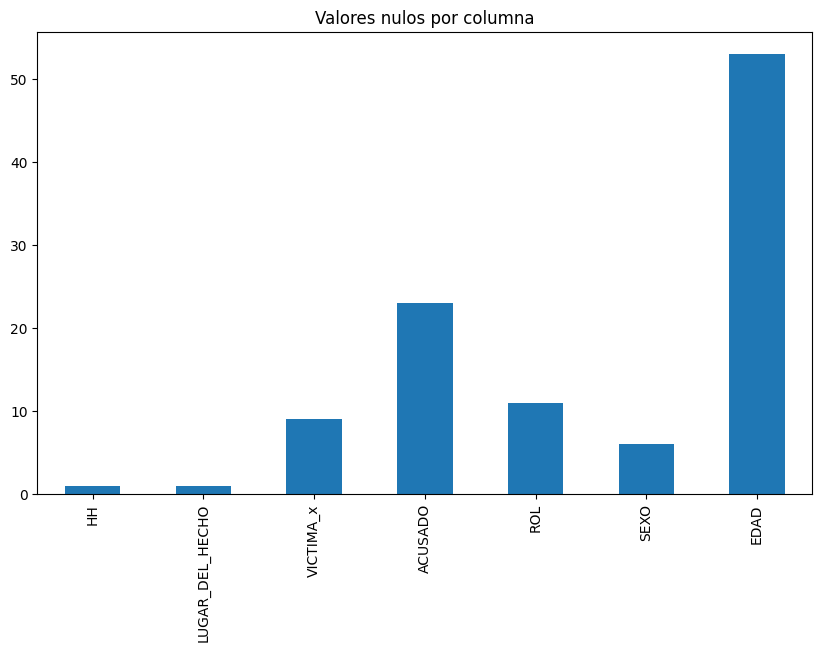

In [47]:
df = (df_fusionado.isin(['sd'])).sum()
df[df > 0].plot.bar(title='Valores nulos por columna',figsize=(10,6))